In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

do the merging here first, and then transform the date time together. Then, assign them to decades

In [ ]:
# merge humid_df, temp_df and the rest into the main mega df

In [500]:
# import all files related to weather
dhr_df = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')
mtr_df = pd.read_csv('../data/rainfall-monthly-total.csv')
nor_df = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
temp_df = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')
humid_df = pd.read_csv('../data/relative-humidity-monthly-mean.csv')

In [501]:
merged_df = mtr_df.merge(nor_df,on=['month']).merge(dhr_df,on=['month']).merge(temp_df, on=['month']).merge(humid_df, on=['month'])

In [516]:
merged_df.tail()

,date,year,month,decade,season,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh
483,2022-04-01,2022,4,20s,Inter-monsoon (Mar-May),239.6,18,58.8,28.1,80.0
484,2022-05-01,2022,5,20s,Inter-monsoon (Mar-May),102.0,12,44.6,29.2,76.5
485,2022-06-01,2022,6,20s,Southwest Monsoon (Jun-Sept),211.8,17,59.4,27.9,79.1
486,2022-07-01,2022,7,20s,Southwest Monsoon (Jun-Sept),145.2,16,27.8,28.6,76.8
487,2022-08-01,2022,8,20s,Southwest Monsoon (Jun-Sept),141.4,15,32.4,28.1,77.4


In [503]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      488 non-null    object 
 1   total_rainfall             488 non-null    float64
 2   no_of_rainy_days           488 non-null    int64  
 3   maximum_rainfall_in_a_day  488 non-null    float64
 4   mean_temp                  488 non-null    float64
 5   mean_rh                    488 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 26.7+ KB


In [504]:
# convert to datetime format
merged_df['date']=pd.to_datetime(merged_df['month'])

# split into year and month
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month

In [505]:
# group months into into monsoon seasons

def monsoon_status(merged_df):
    if merged_df['month'] == 12 or merged_df['month'] == 1 or merged_df['month'] == 2:
        return 'Northeast Monsoon (Dec-Feb)'
    elif merged_df['month'] == 6 or merged_df['month'] == 7 or merged_df['month'] == 8 or merged_df['month']== 9:
        return 'Southwest Monsoon (Jun-Sept)'
    elif merged_df['month'] == 10 or merged_df['month'] == 11:
        return 'Inter-monsoon (Oct - Nov)'
    else:
        return 'Inter-monsoon (Mar-May)'

merged_df['season'] = merged_df.apply(monsoon_status, axis = 1)

In [506]:
# group years into decades

def decade(merged_df):
    if merged_df['year'] < 1990:
        return '80s'
    elif merged_df['year'] >= 1990 and merged_df['year'] < 2000:
        return '90s'
    elif merged_df['year'] >= 2000 and merged_df['year'] < 2010:
        return '00s'
    elif merged_df['year'] >= 2010 and merged_df['year'] < 2020:
        return '10s'
    else:
        return '20s'

merged_df['decade'] = merged_df.apply(decade, axis = 1)

In [508]:
# rename the columns
new_columns_dict = {
    'maximum_rainfall_in_a_day': 'daily_max_rainfall',
    'no_of_rainy_days': 'rainy_days',
}

# assign new column names
merged_df.rename(columns = new_columns_dict, inplace=True) 

In [514]:
merged_df.head()

,date,year,month,decade,season,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh
0,1982-01-01,1982,1,80s,Northeast Monsoon (Dec-Feb),107.1,10,36.5,25.9,81.2
1,1982-02-01,1982,2,80s,Northeast Monsoon (Dec-Feb),27.8,5,9.4,27.1,79.5
2,1982-03-01,1982,3,80s,Inter-monsoon (Mar-May),160.8,11,61.7,27.2,82.3
3,1982-04-01,1982,4,80s,Inter-monsoon (Mar-May),157.0,14,45.1,27.0,85.9
4,1982-05-01,1982,5,80s,Inter-monsoon (Mar-May),102.2,10,33.0,28.0,83.2


In [513]:
# rearrange the columns

merged_df_columns = ['date', 'year', 'month', 'decade', 'season', 'total_rainfall', 'rainy_days', 'daily_max_rainfall', 
                     'mean_temp', 'mean_rh',]

merged_df = merged_df[merged_df_columns]

In [515]:
# save this into a csv file

merged_df.to_csv('../data/merged_data.csv')

In [ ]:
# data dictionary additions

In [ ]:
# eda should be stable, so don't have to redo

In [ ]:
# do a few charts - previous ones are ok. make sure all titles are there

In [ ]:
# do the flu table merge column and save under a new df

In [ ]:
# do the tourists charts as well, and save under another df

In [ ]:
# do a corr for the two dfs

In [437]:
flu_df = pd.read_csv('../data/epidemic-curve.csv')

In [421]:
flu_df.head()

,date,type,value
0,2020-01-23,Imported,1
1,2020-01-23,Local,0
2,2020-01-24,Imported,2
3,2020-01-24,Local,0
4,2020-01-25,Imported,1


In [422]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2106 non-null   object
 1   type    2106 non-null   object
 2   value   2106 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.5+ KB


In [18]:
flu_df.shape

(2106, 3)

In [14]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2106 non-null   datetime64[ns]
 1   type    2106 non-null   object        
 2   value   2106 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 49.5+ KB


In [438]:
flu_df[flu_df['type']=='Imported'].count()

date     1053
type     1053
value    1053
dtype: int64

In [439]:
columns = ['Local','Imported']

In [31]:
columns

['Local', 'Imported']

In [440]:
flu_df.head()

,date,type,value
0,2020-01-23,Imported,1
1,2020-01-23,Local,0
2,2020-01-24,Imported,2
3,2020-01-24,Local,0
4,2020-01-25,Imported,1


In [441]:
flu_df = flu_df.pivot(index="date", columns='type', values="value").reset_index()

In [427]:
flu_df.head()

type,date,Imported,Local
0,2020-01-23,1,0
1,2020-01-24,2,0
2,2020-01-25,1,0
3,2020-01-26,0,0
4,2020-01-27,1,0


In [442]:
# create a new column of total_cases
flu_df['total_cases'] = [x + y for x, y in zip(flu_df['Imported'], flu_df['Local'])]

In [429]:
flu_df.head()

type,date,Imported,Local,total_cases
0,2020-01-23,1,0,1
1,2020-01-24,2,0,2
2,2020-01-25,1,0,1
3,2020-01-26,0,0,0
4,2020-01-27,1,0,1


In [443]:
result = flu_df.groupby(['date']).agg([np.sum])

In [431]:
result.head()

type,Imported,Local,total_cases
,sum,sum,sum
date,,,
2020-01-23,1,0,1
2020-01-24,2,0,2
2020-01-25,1,0,1
2020-01-26,0,0,0
2020-01-27,1,0,1


In [444]:
result.columns = result.columns.map('_'.join)

In [445]:
result = result.reset_index()

In [446]:
result.head()

,date,Imported_sum,Local_sum,total_cases_sum
0,2020-01-23,1,0,1
1,2020-01-24,2,0,2
2,2020-01-25,1,0,1
3,2020-01-26,0,0,0
4,2020-01-27,1,0,1


In [455]:
dhr_df.head()

,month,maximum_rainfall_in_a_day
0,1982-01,36.5
1,1982-02,9.4
2,1982-03,61.7
3,1982-04,45.1
4,1982-05,33.0


In [457]:
# should i change this to date before merging with flu_df?
# flu_df has lesser data, so i think i should

,month,total_rainfall,no_of_rainy_days,maximum_rainfall_in_a_day,temp_mean_daily_min,mean_rh
0,1982-01,107.1,10,36.5,23.3,81.2
1,1982-02,27.8,5,9.4,23.9,79.5
2,1982-03,160.8,11,61.7,24.3,82.3
3,1982-04,157.0,14,45.1,24.3,85.9
4,1982-05,102.2,10,33.0,25.2,83.2


In [423]:
# convert date to datetime format, make this at the end
flu_df['date']=pd.to_datetime(flu_df['date'])

In [55]:
# make date into year and month
# do it after everything is merged
flu_df['year'] = flu_df['date'].dt.strftime('%Y')
flu_df['month'] = flu_df['date'].dt.strftime('%m')

In [127]:
flu_df.head(10)

type,date,Imported,Local,total_cases,year,month
0,2020-01-23,1,0,1,2020,01
1,2020-01-24,2,0,2,2020,01
2,2020-01-25,1,0,1,2020,01
3,2020-01-26,0,0,0,2020,01
4,2020-01-27,1,0,1,2020,01
5,2020-01-28,2,0,2,2020,01
6,2020-01-29,3,0,3,2020,01
7,2020-01-30,3,0,3,2020,01
8,2020-01-31,3,0,3,2020,01
9,2020-02-01,2,0,2,2020,02


In [143]:
merged_df = pd.read_csv('../data/merged_data.csv')

In [144]:
merged_df.head()

,Unnamed: 0,year,month,date,total_rainfall,rainy_days,max_rainfall
0,0,1982,1,1982-01-01,107.1,10,36.5
1,1,1982,2,1982-02-01,27.8,5,9.4
2,2,1982,3,1982-03-01,160.8,11,61.7
3,3,1982,4,1982-04-01,157.0,14,45.1
4,4,1982,5,1982-05-01,102.2,10,33.0


In [108]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      488 non-null    int64  
 1   year            488 non-null    int64  
 2   month           488 non-null    int64  
 3   date            488 non-null    object 
 4   total_rainfall  488 non-null    float64
 5   rainy_days      488 non-null    int64  
 6   max_rainfall    488 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 26.8+ KB


In [146]:
merged_df.loc[merged_df['month']==6]

,Unnamed: 0,year,month,date,total_rainfall,rainy_days,max_rainfall,season
5,5,1982,6,1982-06-01,59.5,8,20.6,Southwest Monsoon
17,17,1983,6,1983-06-01,94.0,11,27.7,Southwest Monsoon
29,29,1984,6,1984-06-01,255.0,14,121.1,Southwest Monsoon
41,41,1985,6,1985-06-01,37.0,14,9.9,Southwest Monsoon
53,53,1986,6,1986-06-01,122.9,13,34.5,Southwest Monsoon
65,65,1987,6,1987-06-01,126.6,15,30.7,Southwest Monsoon
77,77,1988,6,1988-06-01,252.2,13,69.4,Southwest Monsoon
89,89,1989,6,1989-06-01,117.6,12,45.9,Southwest Monsoon
101,101,1990,6,1990-06-01,112.6,9,76.1,Southwest Monsoon
113,113,1991,6,1991-06-01,88.7,9,55.6,Southwest Monsoon


In [304]:
merged_df.head()

,year,month,date,total_rainfall,rainy_days,max_rainfall,season,decade
0,1982,1,1982-01-01,107.1,10,36.5,Northeast Monsoon,80s
1,1982,2,1982-02-01,27.8,5,9.4,Northeast Monsoon,80s
2,1982,3,1982-03-01,160.8,11,61.7,Inter-monsoon (Mar-May),80s
3,1982,4,1982-04-01,157.0,14,45.1,Inter-monsoon (Mar-May),80s
4,1982,5,1982-05-01,102.2,10,33.0,Inter-monsoon (Mar-May),80s


In [148]:
merged_df.drop(columns=['Unnamed: 0'], inplace=True)

In [149]:
merged_df.head()

,year,month,date,total_rainfall,rainy_days,max_rainfall,season
0,1982,1,1982-01-01,107.1,10,36.5,Northeast Monsoon
1,1982,2,1982-02-01,27.8,5,9.4,Northeast Monsoon
2,1982,3,1982-03-01,160.8,11,61.7,Inter-monsoon
3,1982,4,1982-04-01,157.0,14,45.1,Inter-monsoon
4,1982,5,1982-05-01,102.2,10,33.0,Inter-monsoon


<AxesSubplot: xlabel='month'>

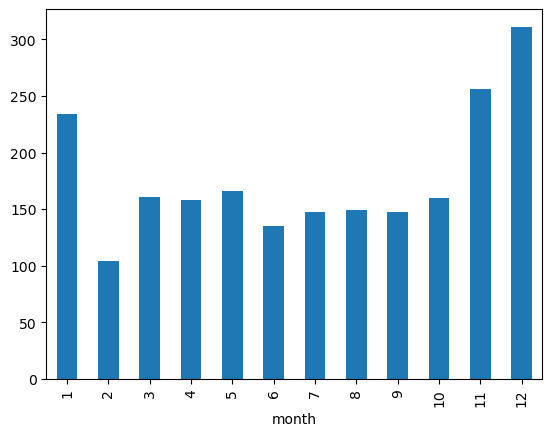

In [274]:
merged_df.groupby('month')['total_rainfall'].mean().plot(kind='bar')

# this shows the relationship between month and total_rainfall. Similar to what i shown
# and has some initial explanation of the seasons
# can i color code them by seasons here?

<Figure size 1400x900 with 0 Axes>

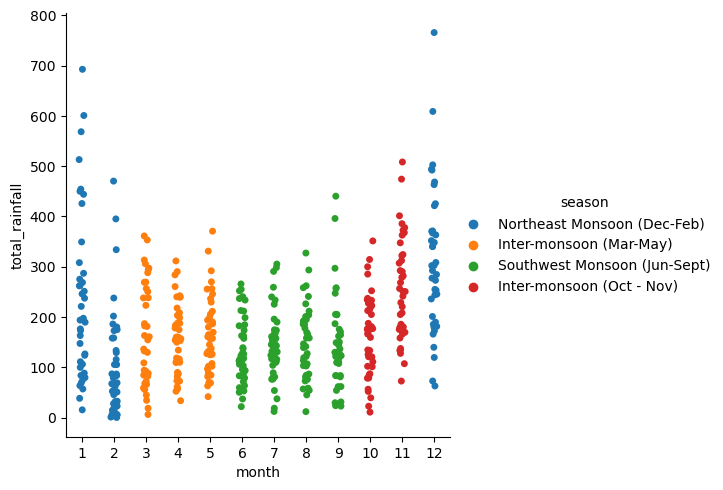

In [322]:
#can use this to show the relationship between season
plt.figure(figsize=(14,9))
sns.catplot(data=merged_df, x="month", y="total_rainfall", hue='season')

<Figure size 1400x900 with 0 Axes>

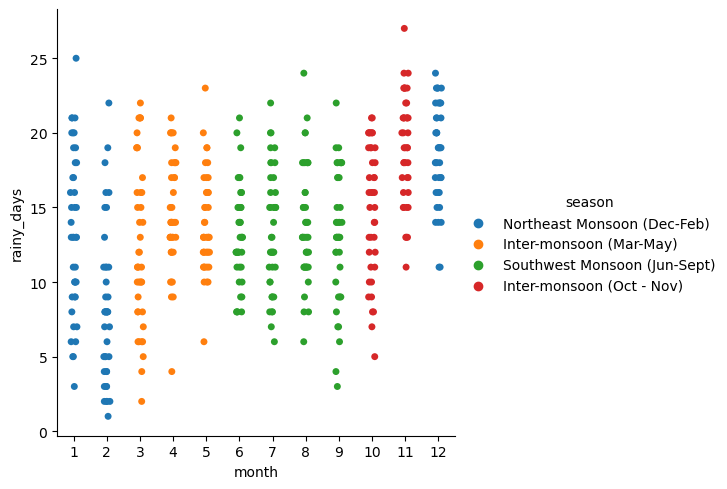

In [317]:
plt.figure(figsize=(14,9))
sns.catplot(data=merged_df, x="month", y="rainy_days", hue='season')

In [156]:
merged_df.head()

,year,month,date,total_rainfall,rainy_days,max_rainfall,season,decade
0,1982,1,1982-01-01,107.1,10,36.5,Northeast Monsoon,80s
1,1982,2,1982-02-01,27.8,5,9.4,Northeast Monsoon,80s
2,1982,3,1982-03-01,160.8,11,61.7,Inter-monsoon,80s
3,1982,4,1982-04-01,157.0,14,45.1,Inter-monsoon,80s
4,1982,5,1982-05-01,102.2,10,33.0,Inter-monsoon,80s


Text(0.5, 29.000000000000007, 'Across the decades')

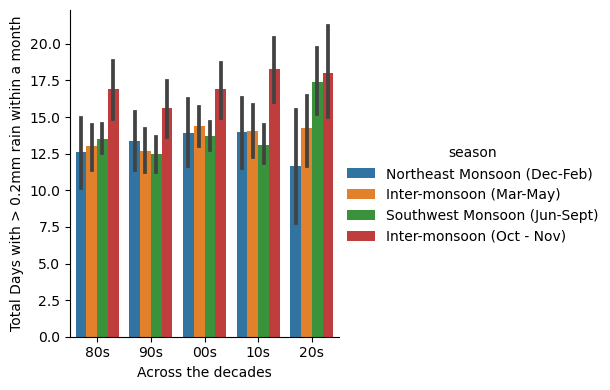

In [318]:
# can we find out the total_rainfall sum < 30mm? we can safely conclude droughts from here
# hard to conclude > 210mm as there might be days with 70mm and less than that which offset it

sns.catplot(data=merged_df, x='decade', y='rainy_days', hue='season', kind='bar', height=4, aspect=1)
plt.ylabel('Total Days with > 0.2mm rain within a month')
plt.xlabel('Across the decades')

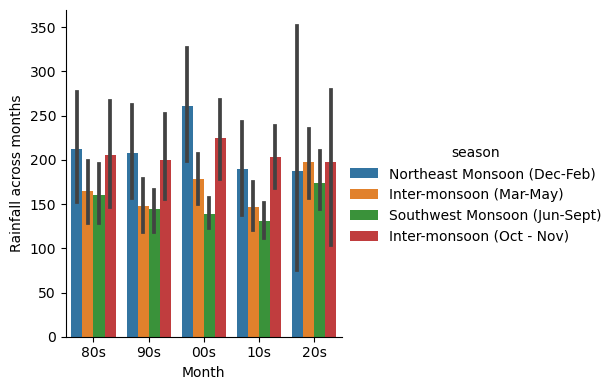

In [391]:
# days with rainfall does not translate to rainfall vol

sns.catplot(data=merged_df, x='decade', y='total_rainfall', hue='season',kind='bar', height=4, aspect=1)
plt.ylabel('Rainfall across months')
plt.xlabel('Month')

plt.show()

<AxesSubplot: xlabel='year'>

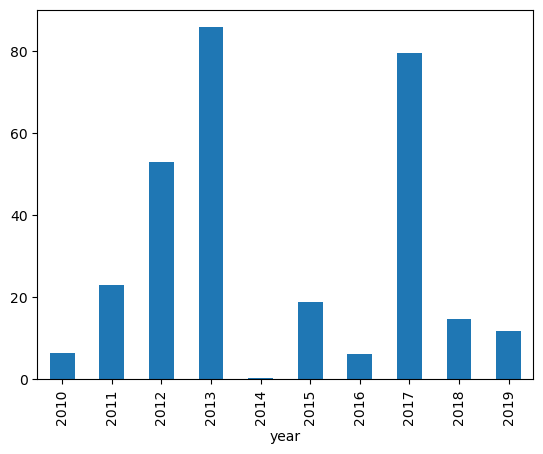

In [355]:
# find out the total_rainfall that are less than 30mm within a month(that would be <1mm per rainy day) during the past decade
merged_df[merged_df['decade']=='10s'].groupby('year')['total_rainfall'].min().plot(kind='bar')

<AxesSubplot: xlabel='year'>

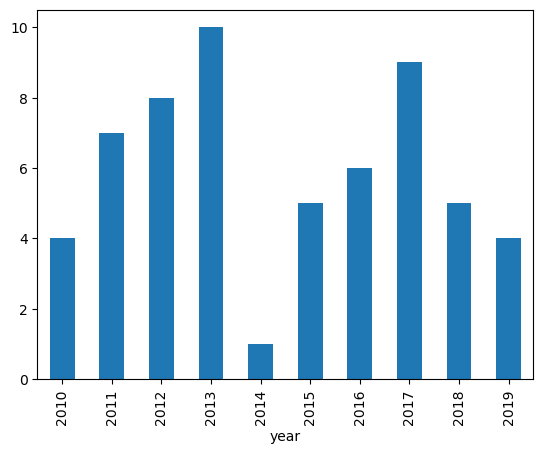

In [356]:
# find out the max rainy days by year; 2015 has the lowest, followed by 2019. droughts happen during these two years
merged_df[merged_df['decade']=='10s'].groupby('year')['rainy_days'].min().plot(kind='bar')

<AxesSubplot: xlabel='year'>

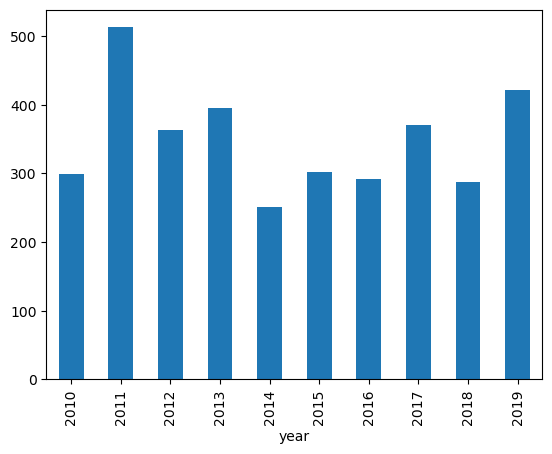

In [359]:
# find out the monthly total_rainfall that are more than 210mm within a month(that would be >70mm per rainy day) during the past decade
merged_df[merged_df['decade']=='10s'].groupby('year')['total_rainfall'].max().plot(kind='bar')

<AxesSubplot: xlabel='year'>

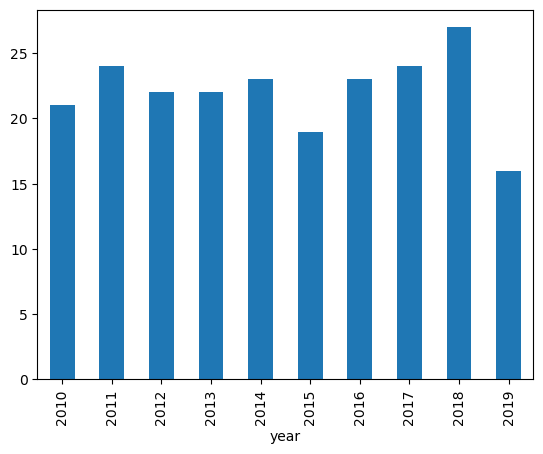

In [353]:
# find out the max rainy days by year; 2017/18 has the highest. but its more dangerous in 2017 as it has a higher max rainfall than 2018. 
# 2011 has no news on flood. why? global warming?
merged_df[merged_df['decade']=='10s'].groupby('year')['rainy_days'].max().plot(kind='bar')

<AxesSubplot: xlabel='year', ylabel='total_rainfall'>

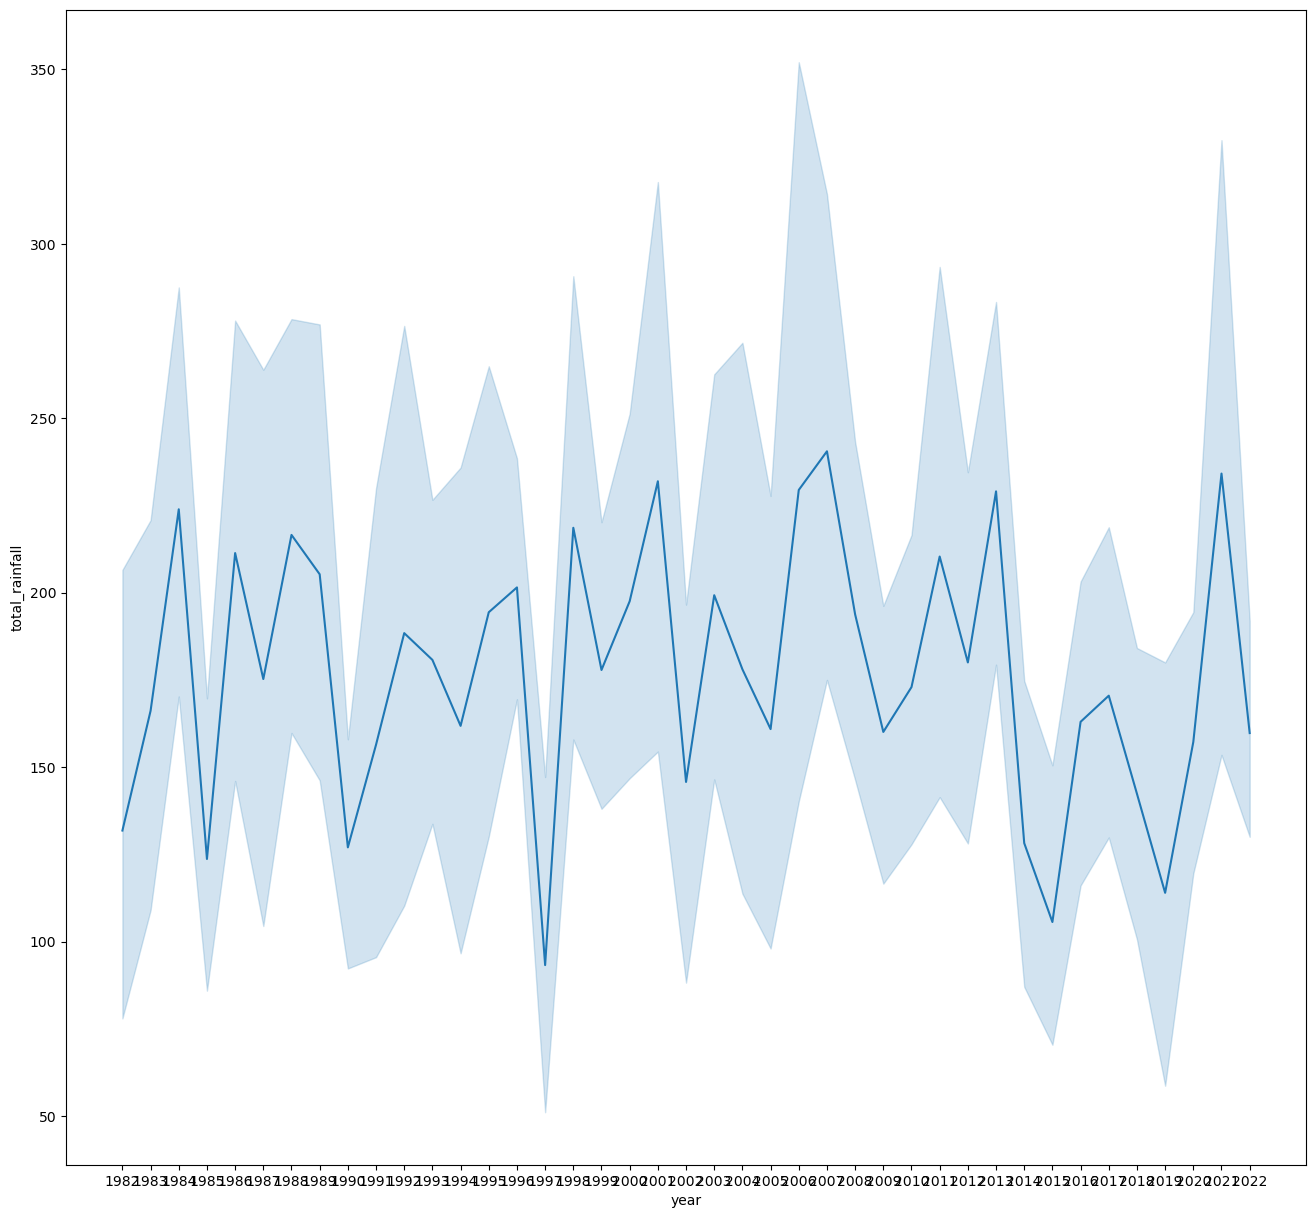

In [235]:
# find out the dry season across time with tempature?
plt.figure(figsize = (16,15))
sns.lineplot(data=merged_df, x='year', y='total_rainfall')

In [272]:
merged_df['year'] = merged_df['year'].astype(int)

In [273]:
merged_df['month'] = merged_df['month'].astype(int)

In [223]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            488 non-null    object 
 1   month           488 non-null    object 
 2   date            488 non-null    object 
 3   total_rainfall  488 non-null    float64
 4   rainy_days      488 non-null    int64  
 5   max_rainfall    488 non-null    float64
 6   season          488 non-null    object 
 7   decade          488 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.6+ KB


<AxesSubplot: xlabel='month'>

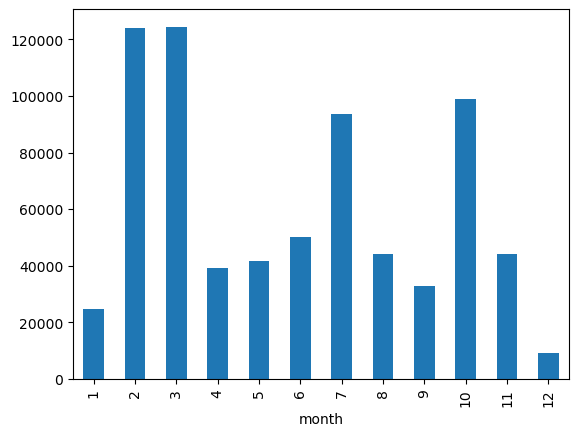

In [275]:
# this shows by the month
result.groupby('month')['total_cases_sum'].mean().plot(kind='bar')

In [213]:
new_result.head()

,year,month_x,Imported_sum,Local_sum,total_cases_sum,date,total_rainfall,rainy_days,max_rainfall,season,decade
0,2020,1,16,0,16,2020-01-01,88.4,6,38.0,Northeast Monsoon,20s
1,2020,1,16,0,16,2020-02-01,65.0,8,23.8,Northeast Monsoon,20s
2,2020,1,16,0,16,2020-03-01,108.8,8,47.4,Inter-monsoon,20s
3,2020,1,16,0,16,2020-04-01,188.0,12,51.8,Inter-monsoon,20s
4,2020,1,16,0,16,2020-05-01,255.6,16,53.8,Inter-monsoon,20s


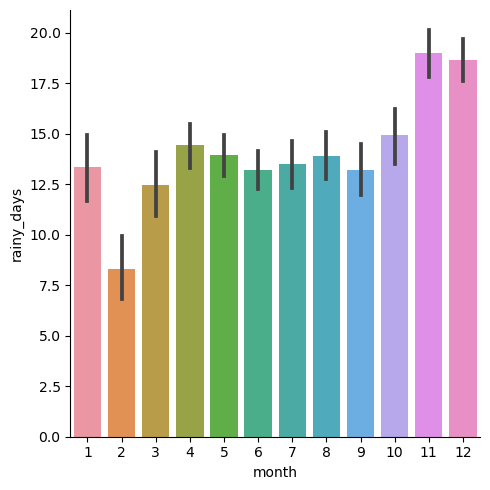

In [210]:
# ...justapoxed with this?
sns.catplot(data=merged_df, x='month', y='rainy_days', kind='bar', s)

In [187]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             36 non-null     object
 1   month            36 non-null     object
 2   Imported_sum     36 non-null     int64 
 3   Local_sum        36 non-null     int64 
 4   total_cases_sum  36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [188]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            488 non-null    int64  
 1   month           488 non-null    int64  
 2   date            488 non-null    object 
 3   total_rainfall  488 non-null    float64
 4   rainy_days      488 non-null    int64  
 5   max_rainfall    488 non-null    float64
 6   season          488 non-null    object 
 7   decade          488 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 30.6+ KB


In [195]:
result['year'] = pd.to_numeric(result['year'])

In [196]:
result['month'] = pd.to_numeric(result['month'])

In [198]:
new_result = result.merge(merged_df, on=['year'], how='left')

In [200]:
new_result.drop(columns=['month_y'], inplace=True)

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_64727/1670312290.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_result.corr()


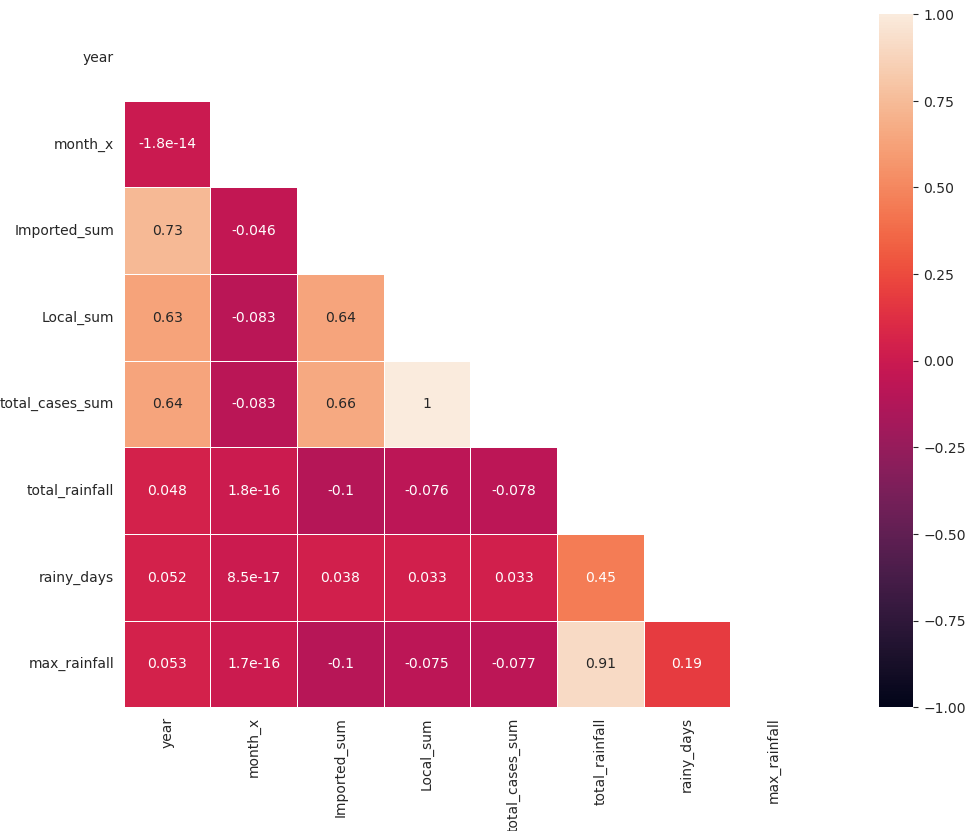

In [201]:
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = new_result.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

In [360]:
merged_df.head()

,year,month,date,total_rainfall,rainy_days,max_rainfall,season,decade
0,1982,1,1982-01-01,107.1,10,36.5,Northeast Monsoon (Dec-Feb),80s
1,1982,2,1982-02-01,27.8,5,9.4,Northeast Monsoon (Dec-Feb),80s
2,1982,3,1982-03-01,160.8,11,61.7,Inter-monsoon (Mar-May),80s
3,1982,4,1982-04-01,157.0,14,45.1,Inter-monsoon (Mar-May),80s
4,1982,5,1982-05-01,102.2,10,33.0,Inter-monsoon (Mar-May),80s


In [288]:
# need to fix

from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

#from bokeh.sampledata.stocks import dates

# Put AAPL stock into a NumPy array.
dates = np.array(merged_df['date'], dtype=np.datetime64)

# Specify the data.
source = ColumnDataSource(data = dict(date = dates, rainfall = merged_df['total_rainfall']))

# Generate the top plot.
p = figure(height = 300,          # What is the height of the top plot? 
           width = 800,           # What is the width of the top plot? 
           tools = "xpan",             # No tools.
           toolbar_location = None,    # No toolbar.
           x_axis_type = "datetime",   # X-axis has a specific type: datetime. Ensures dates appear properly.
           x_axis_location = "above",  # Y-axis needs no specific formatting/typing.
           background_fill_color = "#efefef",     # Specify background color.
           x_range = (dates[10], dates[100]))  # Specify starting x-range for top plot. (1,500th through 2,500th value.)

# Specify the line being generated (similar to plt.plot()).
p.line('date', 'total_rainfall', source = source)

# Setting label on the y-axis (vertical axis).
p.yaxis.axis_label = 'Total Rainfall'

# Generate the bottom plot.
select = figure(title = "Drag the middle and edges of the selection box to change the range above", # Title of the plot.
                height = 130,     # What is the height of the bottom plot? 
                width = 800,      # What is the width of the bottom plot? 
                y_range = p.y_range,   # Make sure that the y-axes have the same height for both top and bottom plots.
                x_axis_type = "datetime",          # X-axis has a specific type: datetime. Ensures dates appear properly.
                y_axis_type = None,                # Y-axis needs no specific formatting/typing.
                tools = "",                        # No tools. (For now; one will be added later.)
                toolbar_location = None,           # No toolbar.
                background_fill_color = "#efefef") # Specify background color.

# Set up the "range tool" in the bottom plot.
range_rool = RangeTool(x_range = p.x_range) # Make sure the x-axes have the same width for the top and bottom plots.
range_rool.overlay.fill_color = "navy"    # Color the "range tool" box navy.
range_rool.overlay.fill_alpha = 0.2       # Make the "range tool" box 80% transparent.

# Specify the line being generated (similar to plt.plot()).
select.line('date', 'total_rainfall', source = source)

# No grid.
select.ygrid.grid_line_color = None

# Add the range_rool tool to the select plot.
select.add_tools(range_rool)
select.toolbar.active_multi = range_rool

# Make our results show up in our Jupyter notebook.
output_notebook()

# If you want the results to show up in a .html file,
# run "from bokeh.io import output_file"
# then run "output_file('./filename.html')"

# Display these in a column with our plot (p) above the select tool in one column.
show(column(p, select))

Loading BokehJS ...

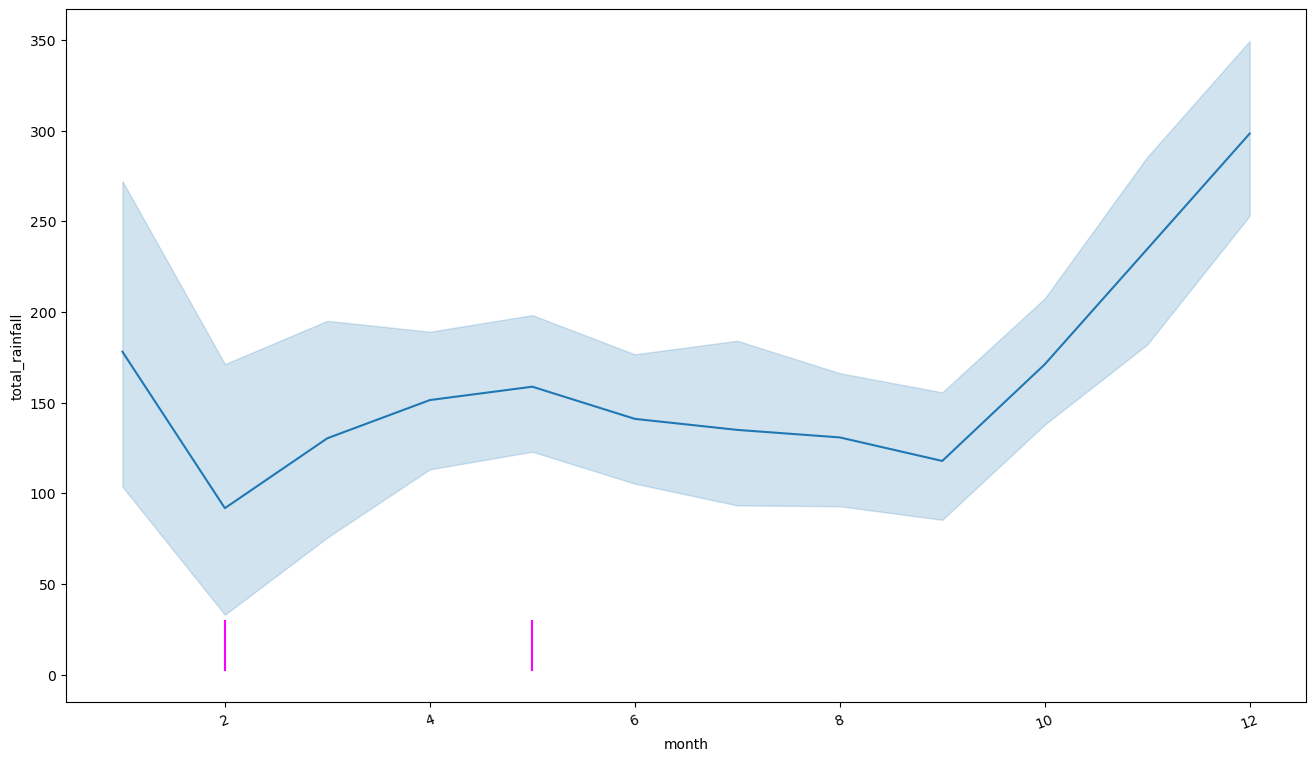

In [382]:
# need to fix this
# time series analysis
plt.figure(figsize = (16,9))

lineplot = plt.subplot(1,1,1)
sns.lineplot(x = "month", y = "total_rainfall", data = merged_df[merged_df['decade']=='10s'])
#sns.lineplot(x = "date", y = "max_rainfall", data = merged_df)
plt.ylabel("total_rainfall")
plt.xticks(rotation = 20)
# the location of drough periods
lineplot.vlines([2,5], 2, 30, colors='magenta')

plt.show()

In [368]:
temp_df.info() #491 rows, month is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                491 non-null    object 
 1   temp_mean_daily_min  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [369]:
temp_df.tail()

,month,temp_mean_daily_min
486,2022-07,25.8
487,2022-08,25.8
488,2022-09,25.4
489,2022-10,24.7
490,2022-11,24.4


In [386]:
temp_df['date']=pd.to_datetime(temp_df['month'])

In [387]:
# make date into year and month
temp_df['year'] = temp_df['date'].dt.strftime('%Y')
temp_df['month'] = temp_df['date'].dt.strftime('%m')

In [394]:
temp_df['year'] = temp_df['year'].astype(int)

In [395]:
temp_df['month'] = temp_df['month'].astype(int)

In [397]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                491 non-null    int64         
 1   temp_mean_daily_min  491 non-null    float64       
 2   date                 491 non-null    datetime64[ns]
 3   year                 491 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 15.5 KB


In [383]:
humid_df.info() # 490 rows, month is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    490 non-null    object 
 1   mean_rh  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [388]:
humid_df['date']=pd.to_datetime(humid_df['month'])

In [398]:
# make date into year and month
humid_df['year'] = humid_df['date'].dt.strftime('%Y')
humid_df['month'] = humid_df['date'].dt.strftime('%m')

In [399]:
humid_df['year'] = humid_df['year'].astype(int)
humid_df['month'] = humid_df['month'].astype(int)

In [400]:
new_result = new_result.merge(humid_df, on=['year'], how='left')

In [392]:
merged_df.info() # 488 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            488 non-null    int64  
 1   month           488 non-null    int64  
 2   date            488 non-null    object 
 3   total_rainfall  488 non-null    float64
 4   rainy_days      488 non-null    int64  
 5   max_rainfall    488 non-null    float64
 6   season          488 non-null    object 
 7   decade          488 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 30.6+ KB


In [415]:
new_result.drop(columns=['temp_mean_daily_min_y', 'date_y'], inplace=True)

In [412]:
new_result.head()

,year,Imported_sum,Local_sum,total_cases_sum,total_rainfall,rainy_days,max_rainfall,season,decade,mean_rh,date_y,month_y,month,temp_mean_daily_min_y,date_y
0,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,2020-01-01,1,1,25.2,2020-01-01
1,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,2020-01-01,1,2,25.3,2020-02-01
2,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,2020-01-01,1,3,25.9,2020-03-01
3,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,2020-01-01,1,4,26.0,2020-04-01
4,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,2020-01-01,1,5,26.1,2020-05-01


In [417]:
new_result = new_result.merge(humid_df, on=['year'], how='left')

In [418]:
new_result.head()

,year,Imported_sum,Local_sum,total_cases_sum,total_rainfall,rainy_days,max_rainfall,season,decade,mean_rh_x,month_y,month_x,month_y,temp_mean_daily_min,date_x,month,mean_rh_y,date_y
0,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,1,1,1,25.2,2020-01-01,1,77.9,2020-01-01
1,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,1,1,1,25.2,2020-01-01,2,76.0,2020-02-01
2,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,1,1,1,25.2,2020-01-01,3,75.2,2020-03-01
3,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,1,1,1,25.2,2020-01-01,4,76.4,2020-04-01
4,2020,16,0,16,88.4,6,38.0,Northeast Monsoon,20s,77.9,1,1,1,25.2,2020-01-01,5,79.1,2020-05-01


In [ ]:
new_columns = ['year', 'month', 'date', 'total_rainfall', 'rainy_days','max_rainfall','season','decade', 'mean_rh','temp_mean_daily_min_y',']

mtr_copy = mtr_copy[mtr_copy_columns]
mtr_copy.head()